In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D  

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("ds4420_spotify.csv") 
X = df[["artist_pop", "track_pop"]].dropna() 

mu_hat = X.mean()      
Sigma_hat = X.cov()  

print("MLE mean vector (mu_hat):")
print(mu_hat)
print("\nMLE covariance matrix (Sigma_hat):")
print(Sigma_hat)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
MLE mean vector (mu_hat):
artist_pop    71.455696
track_pop     61.272152
dtype: float64

MLE covariance matrix (Sigma_hat):
            artist_pop   track_pop
artist_pop  254.886560  204.295574
track_pop   204.295574  359.638837


### (a) Discussion
The covariance matrix has a large positive off‐diagonal entry, indicating a strong positive correlation between artist and track popularity: as one increases, the other tends to do so as well. This means that in the bivariate Gaussian framework, we are dealing with an elliptical (rather than circular) contour shape that slants upward, reflecting the positive linear relationship between these two variables.

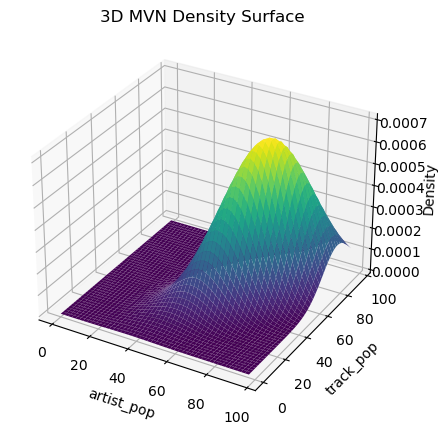

In [3]:
# Create a grid
x1_vals = np.linspace(X["artist_pop"].min(), X["artist_pop"].max(), 50)
x2_vals = np.linspace(X["track_pop"].min(),  X["track_pop"].max(),  50)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
pos = np.dstack([X1, X2])

# Evaluate MVN density
rv = multivariate_normal(mean=mu_hat, cov=Sigma_hat)
Z = rv.pdf(pos)

# Plot 3D surface
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel("artist_pop")
ax.set_ylabel("track_pop")
ax.set_zlabel("Density")
ax.set_title("3D MVN Density Surface")
plt.show()

### (b) Discussion
The peak of the 3D multivariate Gaussian surface occurs at the estimated mean vector, around (artist_pop ≈ 71.46, track_pop ≈ 61.27). Values far from this central point—particularly those reflecting extremely low or extremely high popularity for either artist or track—correspond to very small densities on the surface, suggesting they are much less likely under this model.

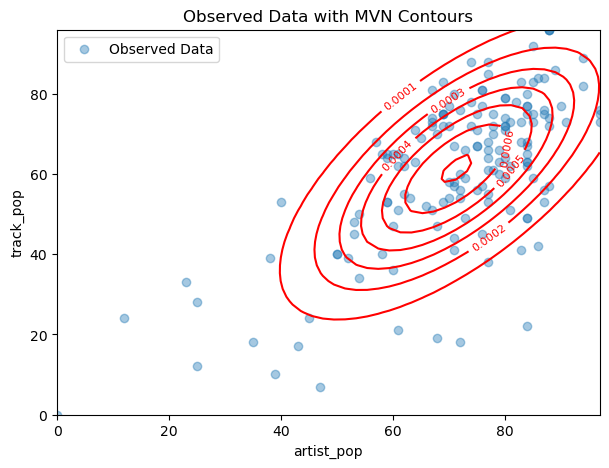

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(X["artist_pop"], X["track_pop"], alpha=0.4, label="Observed Data")

CS = plt.contour(X1, X2, Z, colors='red')
plt.clabel(CS, inline=1, fontsize=8)

plt.xlabel("artist_pop")
plt.ylabel("track_pop")
plt.title("Observed Data with MVN Contours")
plt.legend()
plt.show()

### (c) Discussion
A bivariate Gaussian can capture the general elliptical cloud and positive correlation in the data, but it may not perfectly represent extremes or potential boundaries (e.g., both popularity measures are bounded between 0 and 100). If the scatter appears roughly centralized and “elliptical” without strong skew or multiple clusters, the multivariate Gaussian can be a decent approximation; otherwise, alternative distributions (e.g., bounded or skewed models) might offer a better fit.